In [3]:
dataset_directory = '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/MSc/Modules/COMP8260_AI_Systems_Implementation/Project/dataset/archive'

In [1]:
from os import path, listdir
from cv2 import imread
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import image_dataset_from_directory

In [ ]:
keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

In [9]:
def load_images(a_directory_name):
    return image_dataset_from_directory(
    directory=path.join(dataset_directory, a_directory_name),
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    batch_size=None,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

In [33]:
train_ds= load_images('train')
validation_ds = load_images('valid')
test_ds = load_images('test')

Found 3631 files belonging to 2 classes.
Found 348 files belonging to 2 classes.
Found 169 files belonging to 2 classes.


In [48]:
print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of validation samples: {validation_ds.cardinality()}")
print(f"Number of test samples: {test_ds.cardinality()}")

Number of training samples: 3631
Number of validation samples: 348
Number of test samples: 169


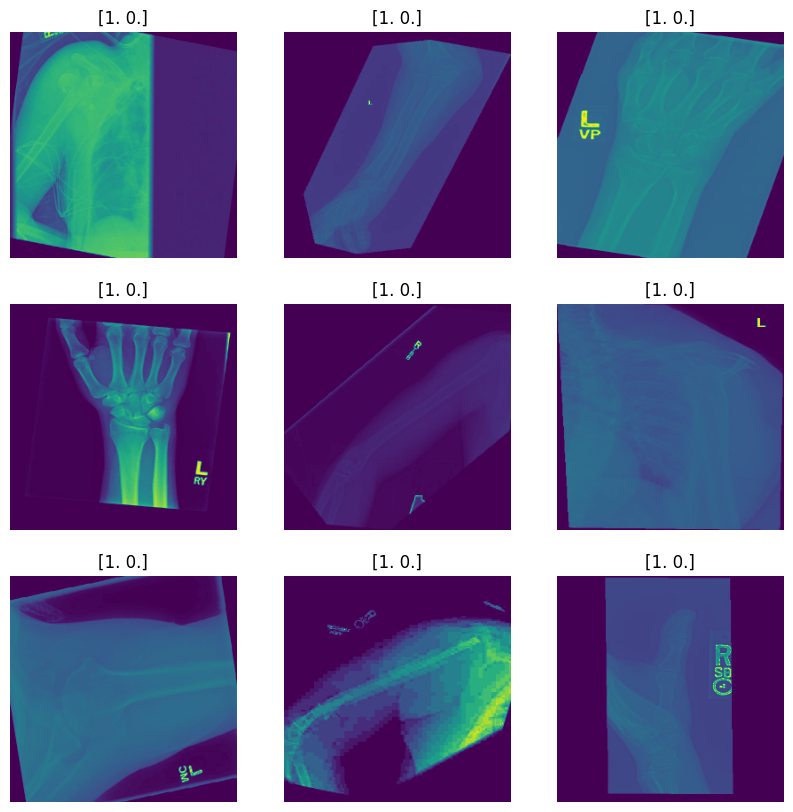

In [47]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    label_1 = label
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label.numpy())
    plt.axis("off")

In [5]:
def load_image(file_path):
    return imread(file_path)

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [49]:
augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    #layers.RandomTranslation(0.1,0.1),
]


def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [50]:
print(f"Number of training samples: {train_ds.cardinality()}")

Number of training samples: 3631


In [51]:
from tensorflow import data as tf_data

batch_size = 64

train_ds = train_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
#validation_ds = validation_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
#test_ds = test_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()

2024-03-01 10:54:37.014124: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


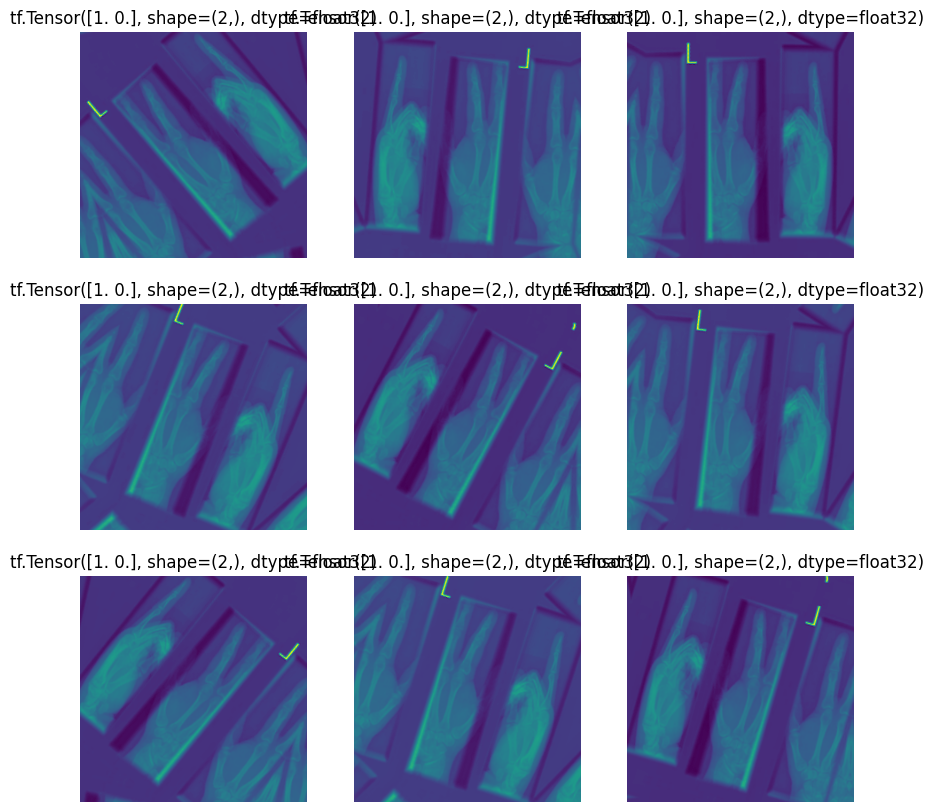

In [53]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(np.expand_dims(first_image, 0))
        plt.imshow(np.array(augmented_image[0]).astype("int32"))
        plt.title((labels[0]))
        plt.axis("off")